# Binding Energy per Nucleon (BEN)

4.0


/Users/rodrigo/opt/anaconda3/envs/nuclear37/lib/python3.7/site-packages/ipykernel_launcher.py:70: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6


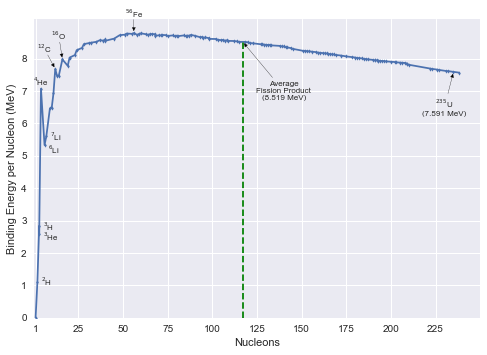

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

mpl.style.use('seaborn')


data = pd.read_csv("binding_energy.csv")

ax = data.plot(x='Nucleons',
               y='BEN',
               legend=None,
               marker='d',
               markersize=3,
               markeredgecolor='k',
               xticks=[1, 25, 50, 75, 100, 125, 150, 175, 200, 225],
               yticks=[0, 1, 2, 3, 4, 5, 6, 7, 8])

plt.vlines(117, 0, 8.519, ls='--', colors='green')

plt.xlim(xmin=0, xmax=250)
plt.ylim(ymin=0)
plt.ylabel('Binding Energy per Nucleon (MeV)')

data = data.set_index('Isotope')

print(data.loc['He-4', 'Nucleons'])

def annotate_nuclide(ax, spec, xytext, ha, arrowprops=None, bbox=None, label=None):
    if label:
        spec_label = label
    else:
        spec_label = '$^{}${}'.format('{' + str(spec[1]) + '}', spec[0])
    ax.annotate(spec_label,
        (data.loc[f'{spec[0]}-{spec[1]}', 'Nucleons'], data.loc[f'{spec[0]}-{spec[1]}', 'BEN']),
        xycoords="data",
        xytext=xytext,
        textcoords='data',
        arrowprops=arrowprops,
        bbox=bbox,
        size=8,
        ha=ha,
        va='center')


annotate_nuclide(ax, ('H', 2), (4, 1.1), 'left')
annotate_nuclide(ax, ('H', 3), (5, 2.8), 'left')
annotate_nuclide(ax, ('He', 3), (5, 2.5), 'left')
annotate_nuclide(ax, ('He', 4), (4, 7.3), 'center')
annotate_nuclide(ax, ('Li', 6), (8, 5.2), 'left')
annotate_nuclide(ax, ('Li', 7), (9, 5.6), 'left')

arrowprops = dict(arrowstyle='-|>', edgecolor='k', facecolor='black')
bbox = dict(pad=-2, facecolor="none", edgecolor="none")
annotate_nuclide(ax, ('C', 12), (6, 8.3), 'center', arrowprops=arrowprops, bbox=bbox)
annotate_nuclide(ax, ('O', 16), (14, 8.7), 'center', arrowprops=arrowprops, bbox=bbox)
annotate_nuclide(ax, ('Fe', 56), (56, 9.4), 'center', arrowprops=arrowprops, bbox=bbox)
annotate_nuclide(ax, ('U', 235), (230, 6.5), 'center', arrowprops=arrowprops,
                 label='$^{235}$U\n' + f'({data.loc["U-235","BEN"]} MeV)')

ax.annotate('Average\nFission Product\n(8.519 MeV)',
            (117, 8.519),
            xytext=(140, 7),
            textcoords='data',
            arrowprops=dict(arrowstyle='-|>', edgecolor='k', facecolor='black'),
            size=8,
            ha='center',
            va='center')

plt.savefig('binding_energy.pdf', bbox='tight')